In [57]:
%matplotlib widget

import os
import sys
import matplotlib.pyplot as plt
from IPython import embed
import pickle

sys.path.append(os.path.abspath("/develop/code/evaluation"))
import evaluation_3 as eval

path_results = "/develop/results/spie_journal_2023"
colors = ['darkgreen','purple','#4e88d9'] 

In [59]:
exp_name = "all_on" # 0. phase | 1. curv | 2. recon/thermo | 3. phase/thermo 

folder_name = exp_name
index = 0

encoder_train = pickle.load(open(os.path.join(path_results, folder_name, "train_info", "encoder.pkl"), "rb"))
recon_train = pickle.load(open(os.path.join(path_results, folder_name, "train_info", "recon.pkl"), "rb"))

encoder_valid =pickle.load(open(os.path.join(path_results, folder_name, "valid_info", "encoder.pkl"), "rb"))
recon_valid = pickle.load(open(os.path.join(path_results, folder_name, "valid_info", "recon.pkl"), "rb"))

resim_train_eval = pickle.load(open(os.path.join(path_results, folder_name, "train_info", "resim.pkl"), "rb"))
resim_valid_eval = pickle.load(open(os.path.join(path_results, folder_name, "valid_info", "resim.pkl"), "rb"))

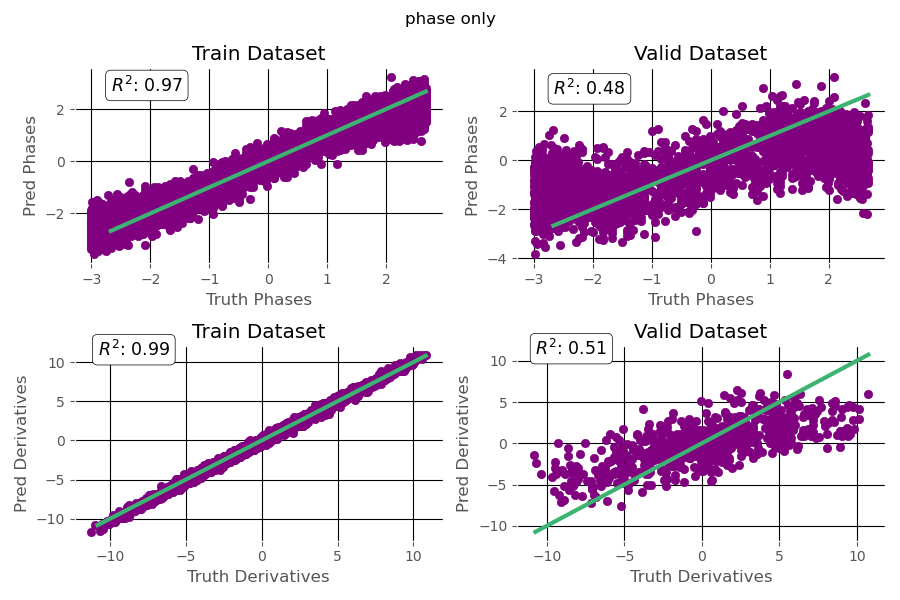

In [60]:
phase_train_truth, phase_train_pred = encoder_train['phase_truth'].flatten(), encoder_train['phase_pred'].flatten()
phase_valid_truth, phase_valid_pred = encoder_valid['phase_truth'].flatten(), encoder_valid['phase_pred'].flatten()
der_train_truth, der_train_pred = encoder_train['deriv_truth'].flatten(), encoder_train['deriv_pred'].flatten()
der_valid_truth, der_valid_pred = encoder_valid['deriv_truth'].flatten(), encoder_valid['deriv_pred'].flatten()
int_train_truth, int_train_pred = encoder_train['intensity_truth'].flatten(), encoder_train['intensity_pred'].flatten()

plt.close("all")
title = "phase only"
eval.regression_plots(title, phase_train_truth, phase_train_pred, phase_valid_truth, phase_valid_pred, der_train_truth, der_train_pred, der_valid_truth, der_valid_pred, save_fig=False)

In [66]:
print(phase_train_truth.min(), phase_train_truth.max())
print(phase_valid_truth.min(), phase_valid_truth.max()) # it makes sense that these are the same as the train values because these are the 'real' mins and maxes represented in the dataset!

print(phase_train_pred.min(), phase_train_pred.max())
print(phase_valid_pred.min(), phase_valid_pred.max()) # these go most outside the (-pi, pi) bounds so i will play with this set

-3.0018585 2.671871
-3.0018585 2.671871
-3.570556 3.2203596
-3.84579 3.3966093


In [97]:
temp_valid = phase_valid_pred[400:600] # i just want to grab a small batch to work with - needs to have min and max outside (-pi, pi)
temp_valid.shape
print(temp_valid.min(), temp_valid.max())

-3.2771842 3.3966093


In [101]:
inside_idx = (temp_valid >= -np.pi) & (temp_valid <= np.pi)
outside_idx = ~inside_idx

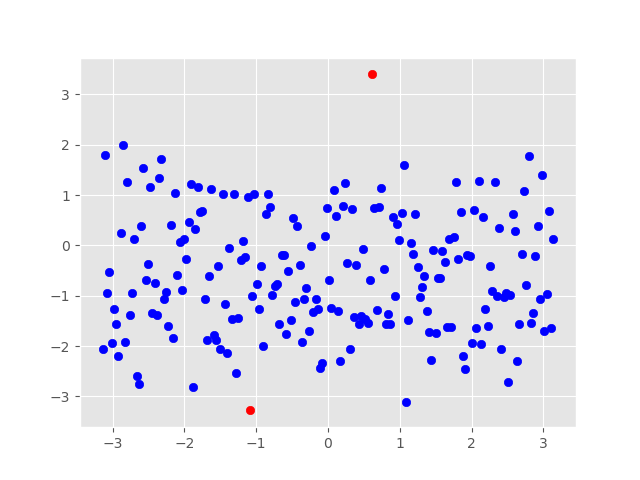

In [102]:
plt.close("all")
x = np.linspace(-np.pi, np.pi, len(temp_valid))
x_in = x[inside_idx]
x_out = x[outside_idx]

y_in = temp_valid[inside_idx]
y_out = temp_valid[outside_idx]

fig, ax = plt.subplots()
ax.scatter(x_in, y_in, c='b')
ax.scatter(x_out, y_out, c='r')

In [105]:
# i think i'll just make up some values actually.
min = -np.pi - 0.5
max = np.pi + 0.5
x = np.linspace(min, max, 10)
y = np.random.uniform(min, max, size=10)

In [106]:
def sort_list(x, y):
    inside_idx = (x >= -np.pi) & (x <= np.pi)
    outside_idx = ~inside_idx

    x_in = x[inside_idx]
    x_out = x[outside_idx]
    y_in = y[inside_idx]
    y_out = y[outside_idx]

    return x_in, x_out, y_in, y_out

Text(0, 0.5, 'random values')

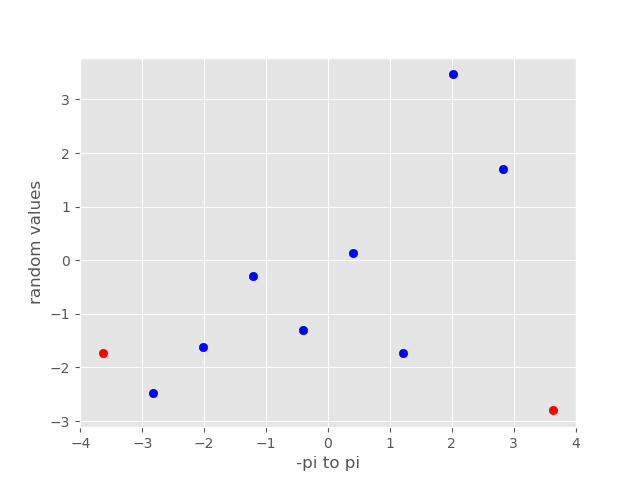

In [110]:
fig, ax = plt.subplots()
x_in, x_out, y_in, y_out = sort_list(x, y)
ax.scatter(x_in, y_in, c='b')
ax.scatter(x_out, y_out, c='r')
ax.set_xlabel("-pi to pi")
ax.set_ylabel("random values")

In [112]:
print(x)
print(y)

[-3.64159265 -2.83234984 -2.02310703 -1.21386422 -0.40462141  0.40462141
  1.21386422  2.02310703  2.83234984  3.64159265]
[-1.73321839 -2.48586788 -1.61594567 -0.29630265 -1.30368623  0.13395832
 -1.73381379  3.46741735  1.69563153 -2.8020291 ]


In [127]:
def wrap_to_pi(value):
    # Ensure the value is within the range -pi to pi
    wrapped_value = (value + np.pi) % (2 * np.pi) - np.pi
    return wrapped_value

# Example usage
input_value = x[0]  # Example value outside the -pi to pi range
print("Input value:", input_value)
print(np.sin(input_value))
wrapped_value = wrap_to_pi(input_value)
print("Wrapped value:", wrapped_value)
print(np.sin(wrapped_value))

Input value: -3.641592653589793
0.4794255386042029
Wrapped value: 2.641592653589793
0.4794255386042031


In [128]:
input_value = x[1]
print("Input value:", input_value)
print(np.sin(input_value))
wrapped_value = wrap_to_pi(input_value)
print("Wrapped value:", wrapped_value)
print(np.sin(wrapped_value))

Input value: -2.83234984168095
-0.30433745342421165
Wrapped value: -2.83234984168095
-0.30433745342421165


In [54]:
plt.close("all")
import numpy as np

def constrain_0(value):
    return np.clip(value, -np.pi, np.pi)

def constrain_1(value):
    min = -np.pi
    max = np.pi
    temp = np.sin(value)
    scaled_value = (temp + 1) * (max - min) / 2 + min
    return scaled_value
    
def testing(truth, pred, target):
    fig, ax = plt.subplots()
    ax.set_title(target)
    #truth = np.sin(truth)
    #pred = np.sin(pred)
    ax.scatter(truth, pred, label = "unconstrained")

    _truth = constrain_1(truth)
    _pred = constrain_1(pred)
    ax.scatter(_truth, _pred, label = "constrained")
    ax.legend()

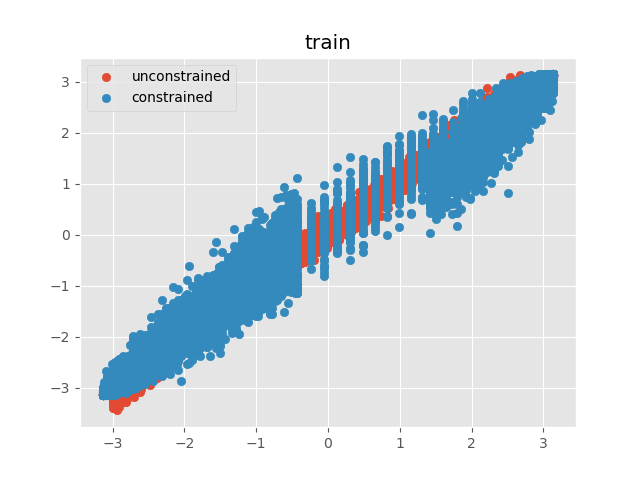

In [55]:
testing(phase_train_truth, phase_train_pred, target = "train")

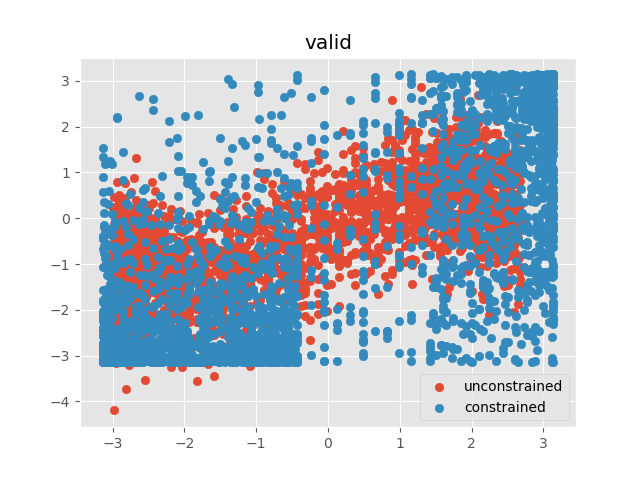

In [56]:
testing(phase_valid_truth, phase_valid_pred, target = "valid")